<a href="https://colab.research.google.com/github/joan39253/pycs4001_hw5/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
path="./drive/MyDrive/Colab_Notebooks/Top_Instagram_Influencers_data.csv"
data=pd.read_csv(path)


posts=list(data["Posts "])
for i in range(len(posts)):
  s=posts[i]
  if s[len(s)-1]=="k":
    s=float(s[:len(s)-1])*1000
  elif s[len(s)-2]=="k":
    s=float(s[:len(s)-2])*1000
  posts[i]=int(s)
data["Posts "]=posts 
data


,Rank,Channel Info,Influence score,Posts,Followers,Total Likes,Country or Region
0,1,cristiano,92,3300,439.7,28.40,Spain
1,2,kyliejenner,91,6900,336.3,57.10,United States
2,3,leomessi,90,855,325.8,5.80,Argentina
3,4,selenagomez,93,1800,318.4,11.40,United States
4,5,therock,91,6500,314.6,12.30,United States
...,...,...,...,...,...,...,...
95,96,433,79,20600,49.7,17.60,Netherlands
96,97,michelleobama,85,571,49.4,0.41,United States
97,98,jamesrodriguez10,86,1000,49.3,1.50,Colombia
98,99,charlidamelio,80,119,48.4,0.51,United States


In [17]:
data.describe()

,Rank,Influence score,Posts,Followers,Total Likes
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,83.900000,5110.860000,107.992000,6.215362
std,29.011492,8.936928,8555.085191,83.003883,7.653804
min,1.000000,22.000000,27.000000,48.400000,0.006210
25%,25.750000,82.000000,999.000000,54.600000,1.800000
50%,50.500000,86.000000,2200.000000,66.650000,3.700000
75%,75.250000,88.000000,5200.000000,129.100000,7.725000
max,100.000000,93.000000,53300.000000,439.700000,57.100000


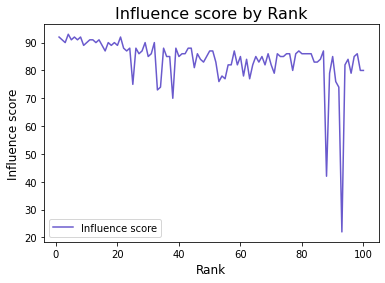

In [18]:
import matplotlib.pyplot as plt
plt.plot(data["Rank "], data["Influence score "], color = 'slateblue', label = "Influence score")
plt.title("Influence score by Rank", fontdict={'fontsize': 16})
plt.xlabel("Rank", fontdict={'fontsize': 12})
plt.ylabel("Influence score", fontdict={'fontname': 'Arial Black', 'fontsize': 12})
plt.legend(loc="lower left")
plt.show()

In [19]:
#print(data["Country or Region "].value_counts())
country=list(data["Country or Region "].value_counts().keys())
#print(country)
num=list(data["Country or Region "].value_counts())
#print(num)

bigger_than_5=list(filter(lambda x:x>=5, num))
smaller_than_5=list(filter(lambda x:x<5, num))
country=country[:len(bigger_than_5)]
num=bigger_than_5
num.append(sum(smaller_than_5))
country.append("Others")
# print(num)
# print(country)


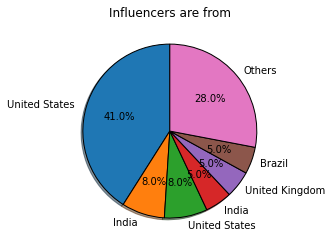

In [20]:
slices = num
labels = country

plt.pie(slices, labels=labels, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Influencers are from")
plt.show()

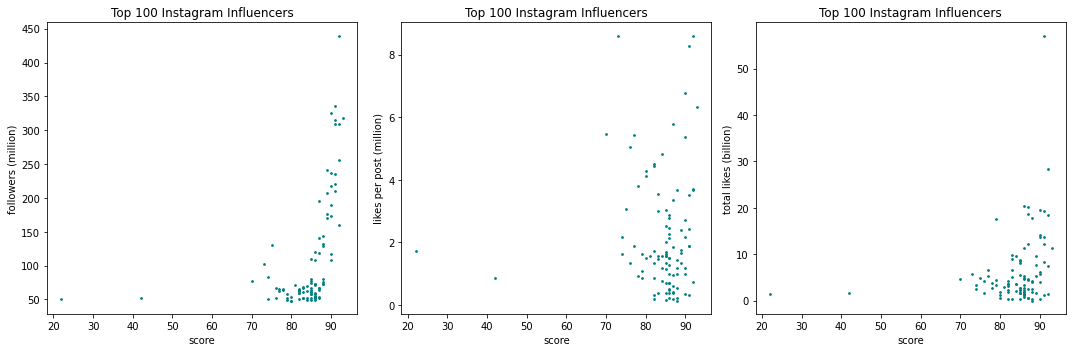

In [21]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5))


ax[0].scatter(data["Influence score "], data["Followers "], color="teal", s=3)
ax[0].set_title('Top 100 Instagram Influencers')
ax[0].set_xlabel('score')
ax[0].set_ylabel('followers (million)')


import numpy as np
likes_in_million=np.array(data["Total Likes"])*1000
likes_per_post=likes_in_million/np.array(data["Posts "])
ax[1].scatter(data["Influence score "], likes_per_post, color="teal", s=3)
ax[1].set_title('Top 100 Instagram Influencers')
ax[1].set_xlabel('score')
ax[1].set_ylabel('likes per post (million)')


ax[2].scatter(data["Influence score "], data["Total Likes"], color="teal", s=3)
ax[2].set_title('Top 100 Instagram Influencers')
ax[2].set_xlabel('score')
ax[2].set_ylabel('total likes (billion)')

fig.tight_layout()
plt.show()